# Starter Codes for Statistics Problem Set
Look out for `### TODO` comments. Those require you to fill out the code for everything to run successfully :)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import scipy as sp
import scipy.stats as sts
from scipy.optimize import minimize
from scipy.special import factorial

## Part 2B
### Question 1

In [9]:
### TODO: insert dataset here
data = [3, 2, 1, 1, 5, 2, 4, 5, 6, 6]

### TODO: find mean and variance
print(np.mean(data))
print(np.var(data))

3.5
3.45


### Question 2

In [10]:
# source: https://stackoverflow.com/a/25828558

def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    return -np.sum(np.log(poisson(data, params[0])))

def negative_log_likelihood(params, data):
    return -sts.poisson.logpmf(data, params[0]).sum()

predicted mean:  3.5000000028771523


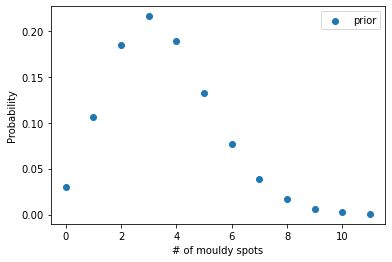

In [25]:
# source: https://stackoverflow.com/a/25828558

# MLE: minimize the negative log-likelihood
result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )

# index for x-axis, number of moldy spots 
k = np.arange(0, 12)

# get the density values for each x
prior = sts.poisson.pmf(k, result.x)

print('predicted mean: ', result.x)

plt.scatter(k, prior,label='prior')
plt.xlabel('# of mouldy spots')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [22]:
result

   direc: array([[-0.00744632]])
     fun: 20.242889672942304
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 2
  status: 0
 success: True
       x: array(3.5)

## Part 2C
### Question 1

In [31]:
### TODO: new observations and combined list here
new_data = [1, 0, 4, 11, 3, 4, 9, 0, 3, 8, 1, 2, 2, 4, 3, 4, 1, 3, 1, 4]
all_data = data + new_data  # consider list concatenation :)

In [32]:
### TODO: print out mean and variance of all the data
print(np.mean(all_data))
print(np.var(all_data))

3.42
7.203600000000002


### Question 2
For the likelihood, we pick something with positive support, such as a truncated normal distribution since we cannot have negative number of mold spot counts.

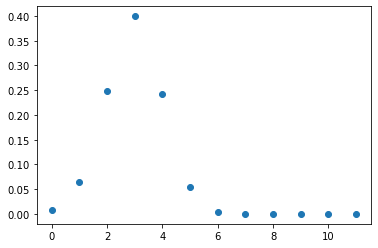

In [33]:
lower_limit = 0
upper_limit = np.inf
sigma = 1  # std for likelihood

def likelihood(datum):
    likelihood_dist = sts.truncnorm.pdf(
        datum,
        (lower_limit - k) / sigma,
        (upper_limit - k) / sigma,
        loc=k,
        scale=sigma
    )

    return likelihood_dist

plt.scatter(k, likelihood(3))  # example likelihood of a datapoint k = 3
plt.show()

Reminder about Bayesian update rule:

$P(\theta|X) = \dfrac{P(X|\theta)P(\theta)}{P(X)}$,

where:
- $\theta$ is the distribution parameter
- $X$ is the observation
- $P(\theta|X)$ is the posterior distribution (PDF)
- $P(\theta)$ is the prior distribution (PDF)
- $P(X|\theta)$ is the likelihood distribution (not a PDF)
- $P(X)$ is the evidence (we don't need this as we will just divide by the area under PDF curve)

In [34]:
unnormalized_posterior = copy.deepcopy(prior)

for datum in new_data:
    lklhd = likelihood(datum)
    
    ### TODO: what is the posterior? (hint: you can forget about P(X) for now)
    unnormalized_posterior *= lklhd
    
# normalize the posterior so that area under this new PDF adds up to 1
area = sp.integrate.trapz(unnormalized_posterior, k) + 1e-10000
posterior = unnormalized_posterior / area

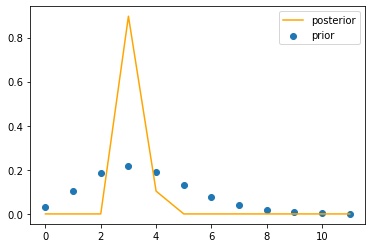

In [35]:
# comparing posterior to the prior
plt.scatter(k, prior, label="prior")
plt.plot(k, posterior, label="posterior", color="orange")
plt.legend()
plt.show()

In [42]:
### TODO: recover the estimated mean of the number of moldy spots from the posterior
# HINT: probability density is a weighting of each data point in the discrete distribution (such as ours)
mean = np.sum(k*posterior)  # expression containing `k` and `posterior` 
print(mean)

3.1034083903225778
